In [27]:
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Column
from astroquery.mast import Tesscut
from lightkurve import TessTargetPixelFile, TessQualityFlags, TessLightCurve, LombScarglePeriodogram
from lightkurve import search_targetpixelfile, search_tesscut, TessLightCurveFile
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from random import randint, sample

In [108]:
# Open Chelsea's sample light curve, there are 5 cadences missing in downloaded raw data
quality_sample = fits.open('DataInput/ClusterQuality/Sector8_Sample.fits.gz')
# So I got to use a shorter quality mask
quality_mask = quality_sample[1].data['QUALITY'][5:]
# I replace all of the 1s with 128s, matching the quality flags: 128 = Manual Exclude
quality_mask[quality_mask == 1] = 128


with fits.open('DataOutput/LightCurves/TESS_LC_144752281_SEC8.fits', mode='update') as hdul:
    hdul[1].data['QUALITY'] = quality_mask
    # Change something in hdul.
    hdul.flush()  # changes are written back to original.fits

# closing the file will also flush any changes and prevent further writing


In [109]:
quality_sample = fits.open('DataInput/ClusterQuality/Sector8_Sample.fits.gz')
quality_mask = quality_sample[1].data['QUALITY'][5:]
quality_mask[quality_mask == 1] = 128

lc = TessLightCurveFile('DataOutput/LightCurves/TESS_LC_144752281_SEC8.fits').get_lightcurve('FLUX')

# lc.scatter(style=plt.style.available[-2], s=3, )

In [3]:
# x = fits.open('DataOutput/LightCurves/TESS_LC_144752281_SEC8.fits')
# x[1].data['QUALITY']


In [90]:
# LombScarglePeriodogram.from_lightcurve??

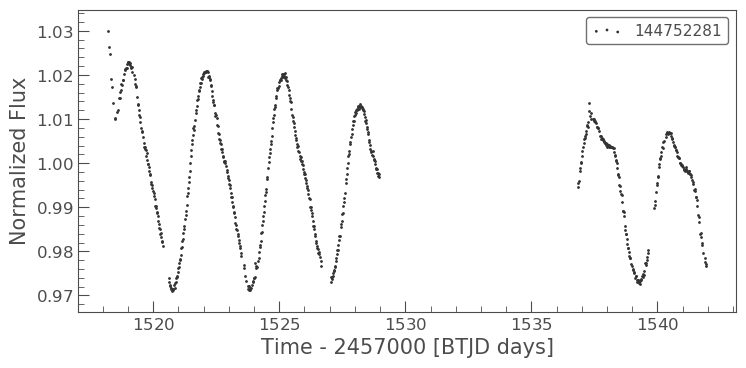

In [110]:
lc.remove_outliers(sigma=2.5).scatter()

In [76]:
# lc._get_quality() & quality_mask

In [101]:
# num_terms is the number of terms for which the fourier expansion is done (how complex are the oscillations?)
num_terms = 1
# Min_period is the minimum detectable period
min_period = 4.
# max_period is the maximum detectable period
max_period = 20.

ov_sampling = 8

pg = lc.remove_outliers(sigma=2.5).to_periodogram(method='lombscargle', minimum_period=min_period, maximum_period=max_period,
                                                nterms=num_terms, oversample_factor=ov_sampling)

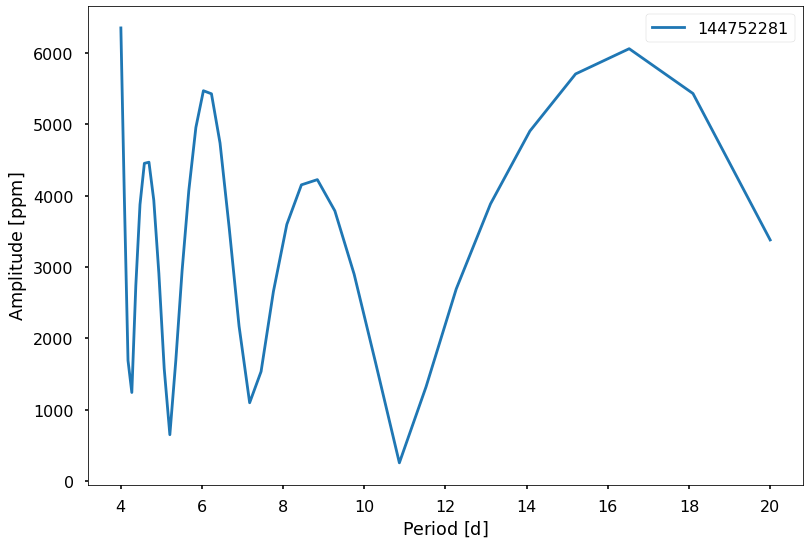

In [102]:
ax = pg.plot(scale='linear', view='period', style=plt.style.available[-2])

In [103]:
pg.period[pg.power.argsort()][-10:]

<Quantity [ 4.69769524,  6.44838285, 14.08142734,  5.85345453,  6.23707666,
           18.09827587,  6.0391796 , 15.20643199, 16.5268047 ,  4.00564768] d>

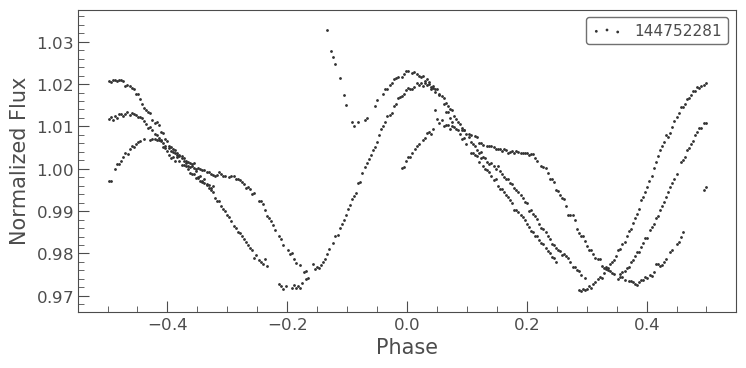

In [105]:
lc.remove_outliers(sigma=2.5).fold(period=6.0, t0=1525).scatter()